### Group Contributions Statement

Placeholder

### Data import and cleaning

In [18]:
import ssl#my computer is weird and only imports files given this command delete before turning in
ssl._create_default_https_context = ssl._create_unverified_context #my computer is weird and only imports files given this command delete before turning in
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url = "https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [19]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
y = penguins['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
def cleanX(penguins): 
    # drop unnecessary columns
    penguins = penguins.dropna()
    
    # recode sex column labels into integers
    recode_sex = {"MALE" : 0, "FEMALE" : 1, "." : 2} 
    penguins["Sex"] = penguins["Sex"].map(recode_sex) 
    penguins = penguins[penguins['Sex'] != 2]
    
    # recode island column labels into integers
    recode_island = {'Biscoe' : 0, 'Dream' : 1, 'Torgersen' : 3} 
    penguins["Island"] = penguins["Island"].map(recode_island)
    le = preprocessing.LabelEncoder()
    
    # clutch competition
    penguins['Clutch Completion'] = le.fit_transform(penguins['Clutch Completion'])
    
    return penguins

def cleanY(penguins):
    # drop unnecessary columns
    penguins = penguins.dropna()
    # clean species column
    penguins = penguins.str.split().str.get(0)
    return penguins
cleanX(X_train)
cleanX(X_test)
cleanY(y_train)
cleanY(y_test)

C:\Users\Wiggles\AppData\Local\Temp/ipykernel_30664/1458561612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Sex"] = penguins["Sex"].map(recode_sex)
C:\Users\Wiggles\AppData\Local\Temp/ipykernel_30664/1458561612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Sex"] = penguins["Sex"].map(recode_sex)


,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
66,Biscoe,35.5,Yes,16.2,195.0,3350.0,FEMALE,8.56192,-25.95541
229,Biscoe,46.8,Yes,15.4,215.0,5150.0,MALE,8.16310,-25.38017
7,Torgersen,39.2,No,19.6,195.0,4675.0,MALE,9.46060,-24.89958
140,Dream,40.2,Yes,17.1,193.0,3400.0,FEMALE,9.28810,-25.54976
323,Biscoe,49.1,Yes,15.0,228.0,5500.0,MALE,8.65914,-25.79203
...,...,...,...,...,...,...,...,...,...
188,Dream,47.6,Yes,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
71,Torgersen,39.7,Yes,18.4,190.0,3900.0,MALE,9.29808,-25.23453
106,Biscoe,38.6,Yes,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
270,Biscoe,46.6,Yes,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((275, 9), (69, 9), (275,), (69,))

In [22]:
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
66,Biscoe,35.5,Yes,16.2,195.0,3350.0,FEMALE,8.56192,-25.95541
229,Biscoe,46.8,Yes,15.4,215.0,5150.0,MALE,8.16310,-25.38017
7,Torgersen,39.2,No,19.6,195.0,4675.0,MALE,9.46060,-24.89958
140,Dream,40.2,Yes,17.1,193.0,3400.0,FEMALE,9.28810,-25.54976
323,Biscoe,49.1,Yes,15.0,228.0,5500.0,MALE,8.65914,-25.79203


### Exploratory Analysis

In [23]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)
penguins2 = pd.concat([train,test], axis=0)

In [24]:
penguins2.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
66,Biscoe,35.5,Yes,16.2,195.0,3350.0,FEMALE,8.56192,-25.95541,Adelie Penguin (Pygoscelis adeliae)
229,Biscoe,46.8,Yes,15.4,215.0,5150.0,MALE,8.16310,-25.38017,Gentoo penguin (Pygoscelis papua)
7,Torgersen,39.2,No,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Adelie Penguin (Pygoscelis adeliae)
140,Dream,40.2,Yes,17.1,193.0,3400.0,FEMALE,9.28810,-25.54976,Adelie Penguin (Pygoscelis adeliae)
323,Biscoe,49.1,Yes,15.0,228.0,5500.0,MALE,8.65914,-25.79203,Gentoo penguin (Pygoscelis papua)


Text(0.5, 0.98, 'Culmen Depth vs Culmen Length')

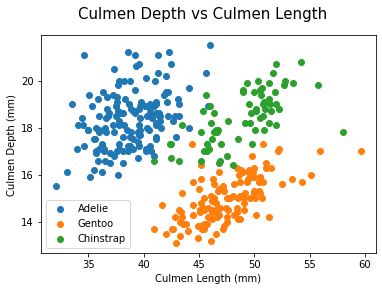

In [29]:
fig, ax = plt.subplots(1)
species = set(penguins['Species'])

for s in species:
    i = penguins[penguins['Species'] == s]
    ax.scatter(i['Culmen Length (mm)'], i['Culmen Depth (mm)'], label = s)

ax.legend()

ax.set(xlabel = 'Culmen Length (mm)',
       ylabel = 'Culmen Depth (mm)')

fig.suptitle('Culmen Depth vs Culmen Length', fontsize=15)


In [39]:
penguins2

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
66,Biscoe,35.5,Yes,16.2,195.0,3350.0,FEMALE,8.56192,-25.95541,Adelie Penguin (Pygoscelis adeliae)
229,Biscoe,46.8,Yes,15.4,215.0,5150.0,MALE,8.16310,-25.38017,Gentoo penguin (Pygoscelis papua)
7,Torgersen,39.2,No,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Adelie Penguin (Pygoscelis adeliae)
140,Dream,40.2,Yes,17.1,193.0,3400.0,FEMALE,9.28810,-25.54976,Adelie Penguin (Pygoscelis adeliae)
323,Biscoe,49.1,Yes,15.0,228.0,5500.0,MALE,8.65914,-25.79203,Gentoo penguin (Pygoscelis papua)
...,...,...,...,...,...,...,...,...,...,...
321,Biscoe,55.9,Yes,17.0,228.0,5600.0,MALE,8.31180,-26.35425,Gentoo penguin (Pygoscelis papua)
172,Dream,42.4,Yes,17.3,181.0,3600.0,FEMALE,9.35138,-24.68790,Chinstrap penguin (Pygoscelis antarctica)
73,Torgersen,45.8,Yes,18.9,197.0,4150.0,MALE,8.18658,-26.45978,Adelie Penguin (Pygoscelis adeliae)
76,Torgersen,40.9,Yes,16.8,191.0,3700.0,FEMALE,8.47257,-26.02002,Adelie Penguin (Pygoscelis adeliae)


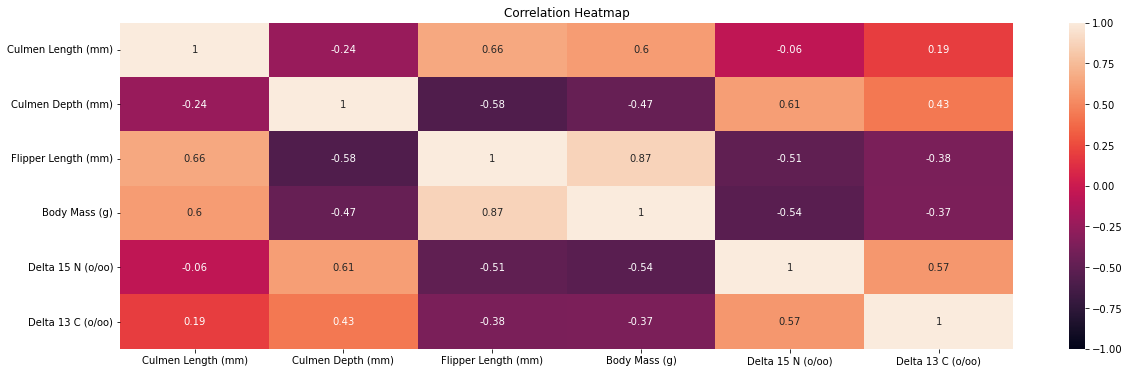

In [38]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(penguins2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

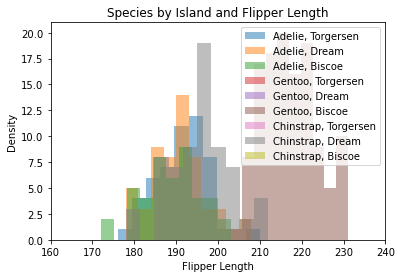

In [27]:
penguins["Species"] = penguins["Species"].str.split().str.get(0)

fig.set_figheight(15)
fig.set_figwidth(10)

fig, ax = plt.subplots(1) 
species = set(penguins['Species']) 
location = set(penguins['Island'])

ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density',
       title = 'Species by Island and Flipper Length')

for s in species:
    i = penguins[penguins['Species'] == s] 
    for l in location:
        t = i[i['Island'] == l]
        ax.hist(t['Flipper Length (mm)'], label = str(s) + ', ' + str(l) , alpha = 0.5) 
        ax.set_xlim([160,240])

        ax.legend()


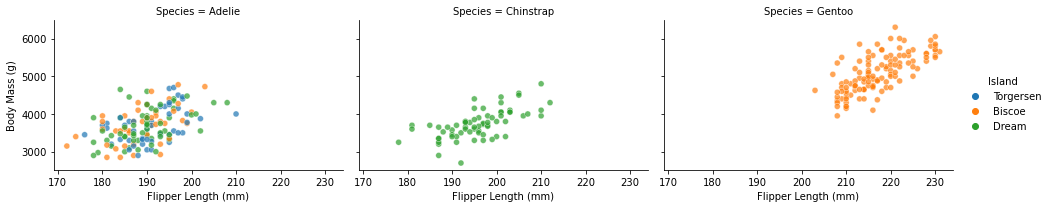

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
fgrid = sns.relplot(x = 'Flipper Length (mm)', 
                    y = 'Body Mass (g)', 
                    hue = "Island", 
                    data = penguins,
                    alpha = .7,
                    col = "Species",
                    height = 3,
                    aspect = 1.5)

### Feature Selection

Based on the data we've gotten from above we've decided that Culmen Depth, Culmen Length, and Island were most appropriate for our future models as they had the highest correlation with species in our heatmap.

### Modeling

In [42]:
X_train = X_train['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
'''function that makes a confusion matrix using predicted values as compared to actual values'''
def makeCM(y_pred):
    from sklearn.metrics import confusion_matrix

    import seaborn as sns
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('Predicted Species')
    ax.set_ylabel('Actual Species');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1','2'])
    ax.yaxis.set_ticklabels(['0','1','2'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Discussion